# Bike Sharing Demand
**Problem Statement**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Import required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Read the dataset

In [2]:
bike = pd.read_csv("day.csv",index_col=None)

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.shape

(730, 16)

In [7]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#checking null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data Cleaning 

In [9]:
#from the given dataset, it can be observe that "instant" column is index , so I will drop it
bike.drop(['instant'],axis=1,inplace=True)

In [10]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#I will drop dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'],axis=1, inplace=True)

#I will also drop casual and registered columnsa as there is cnt column which is sum of the both that is the target column

bike.drop(['casual','registered'], axis = 1, inplace = True)

In [12]:
bike.tail(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
720,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,1749
721,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,1787
722,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,920
723,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,1013
724,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,441
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796
729,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [13]:
#value counts of season
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
#mapping season feature
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall' , 4:'winter'})

In [15]:
#value count of weathersit 
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
#mapping weathersit feature
bike['weathersit']=bike['weathersit'].map({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

In [17]:
#value count of weekday
bike.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [18]:
#value count of mnth
bike['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [19]:
#mapping weekday as per date as 1st january 2018 is "monday" and weekday in dataset in 6, therfore I mapped 0:tuesday, 1: wednesday, etc.
bike['weekday']=bike['weekday'].map({0:"Tuesday",1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday",5:"Sunday",6:"Monday"})
#mapping mnth feature
bike['mnth']=bike['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [20]:
#value count of weekday
bike.weekday.value_counts()

Monday       105
Wednesday    105
Tuesday      105
Saturday     104
Sunday       104
Thursday     104
Friday       103
Name: weekday, dtype: int64

In [21]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Monday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tuesday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# EDA (Exploratory data analysis)

### Analysis on numerical variables

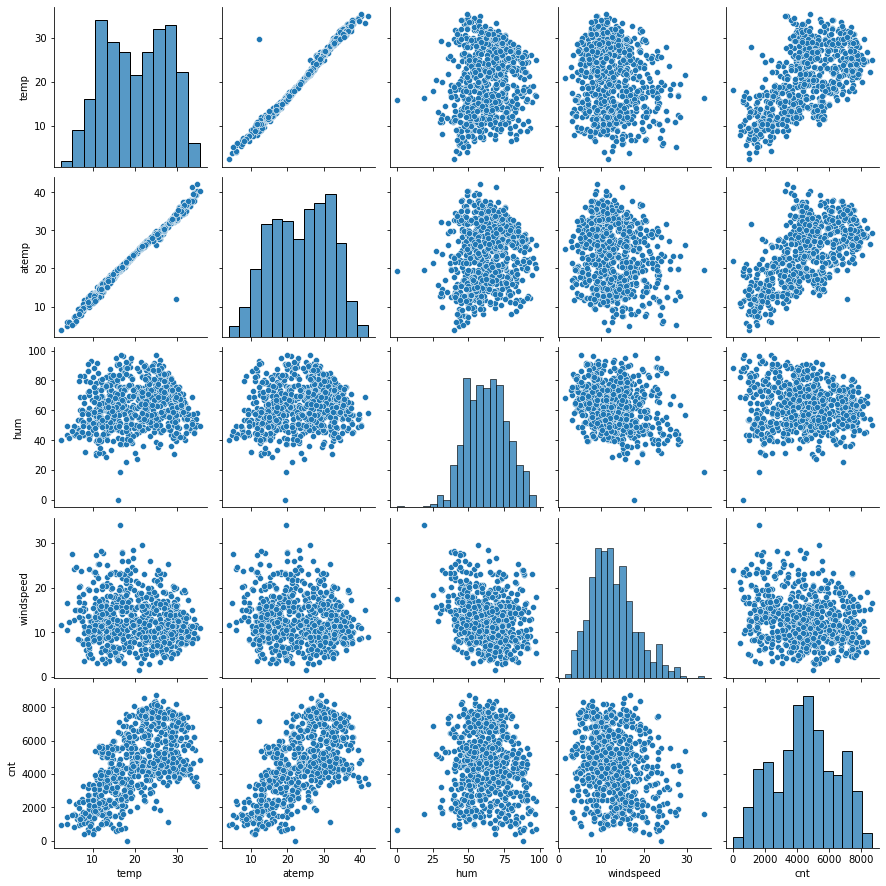

In [23]:
# pairplot to check numerical variables
sns.pairplot(bike,vars=['temp','atemp','hum','windspeed','cnt'])

**Inference** : 
- It can be observed that "temp" and "atemp" has highest correlation with "cnt" variable.
- Also, "temp" and "atemp" are highly correlated with each other.

<AxesSubplot:>

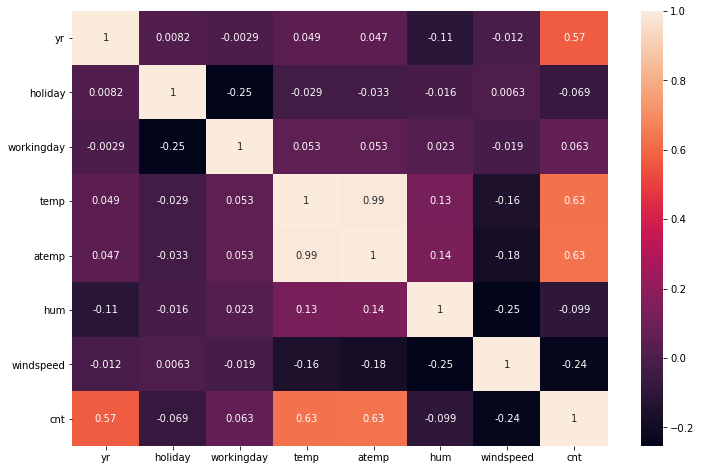

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(bike.corr(),annot=True)

**Inference**: As seen from the heatmap, output variable i.e cnt has a linear relationship with variables like temp, atemp.

### Analysis on categorical variables

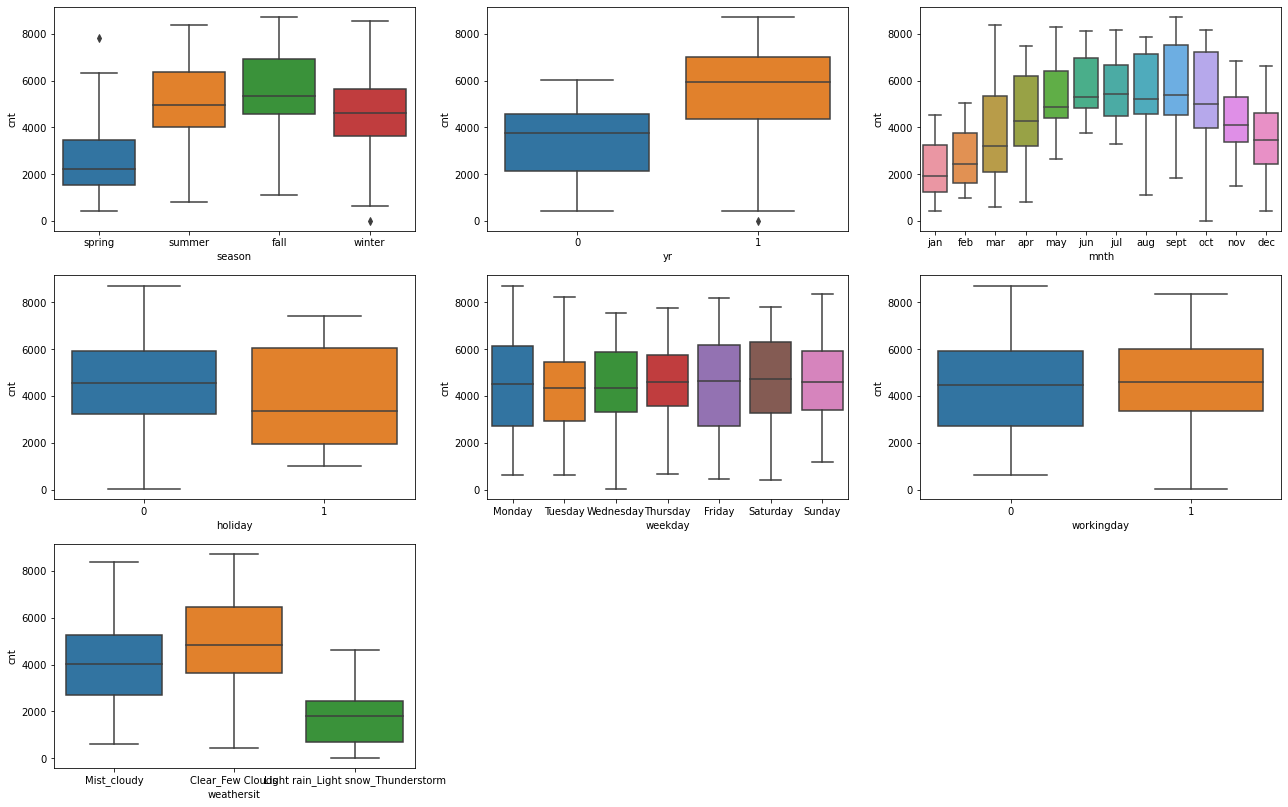

In [25]:
#plotting boxplot in categorical variables
plt.figure(figsize=(22, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

# Data Preperation

In [26]:
#creating dummy variables for categorical variables like season, month, weekdays, weathersit
dummy = bike[['season','mnth','weathersit','weekday']]

In [27]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [28]:
#concat the dummy bike with original one
bike = pd.concat([dummy,bike],axis=1)

In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   season_spring                                  730 non-null    uint8  
 1   season_summer                                  730 non-null    uint8  
 2   season_winter                                  730 non-null    uint8  
 3   mnth_aug                                       730 non-null    uint8  
 4   mnth_dec                                       730 non-null    uint8  
 5   mnth_feb                                       730 non-null    uint8  
 6   mnth_jan                                       730 non-null    uint8  
 7   mnth_jul                                       730 non-null    uint8  
 8   mnth_jun                                       730 non-null    uint8  
 9   mnth_mar                                       730 non

In [30]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)
bike.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
bike.shape

(730, 30)

## Split into train and test

In [32]:
df_train,df_test = train_test_split(bike,test_size=0.3,random_state=100)

In [33]:
print("Shape of X_train",df_train.shape)
print("Shape of X_test",df_test.shape)

Shape of X_train (511, 30)
Shape of X_test (219, 30)


## Feature Scaling

In [34]:
#scaling all features using min max scaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

<ipython-input-35-feee8d1104bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\sonas_000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


## Dividing into X and Y sets for the model building 

In [36]:
y_train = df_train.pop('cnt')
X_train = df_train

In [37]:
X_train.shape

(511, 29)

# Model building

Fit a regression line through the training data using statsmodels. In statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default. 

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
#fit linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

#running rfe with number of variable 13
rfe = RFE(lr,13)
rfe = rfe.fit(X_train, y_train)

C:\Users\sonas_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [40]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 3),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 16),
 ('weekday_Sunday', False, 14),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 11),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'weekday_Monday', 'yr', 'holiday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

### Building the model using statsmodel for detail analysis 

## Model 1

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model
lr_model = sm.OLS(y_train,X_train_rfe1).fit()

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.8
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          5.21e-190
Time:                        20:08:37   Log-Likelihood:                 510.85
No. Observations:                 511   AIC:                            -993.7
Df Residuals:                     497   BIC:                            -934.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2802      0.035      8.100      0.000       0.212       0.348
season_spring                                    -0.0560      0.021     -2.684      0.008      -0.097      -0.015
season_summer                                     0.0534      0.015      3.555      0.000       0.024       0.083
season_winter                                     0.0987      0.017      5.714      0.000       0.065       0.133
mnth_jul                                         -0.0578      0.018     -3.154      0.002      -0.094      -0.022
mnth_sept                                         0.0828      0.017      4.945      0.000       0.050       0.116
weathersit_Light rain_Light snow_Thunderstorm    -0.2385      0.026     -9.040      0.000      -0.290      -0.187
weathersit_Mist_cloudy                           -0.0535      0.010     -5.095      0.000      -0.074      -0.033
weekday_Monday                                    0.0171      0.011      1.541      0.124      -0.005       0.039
yr                                                0.2303      0.008     28.329      0.000       0.214       0.246
holiday                                          -0.0945      0.026     -3.684      0.000      -0.145      -0.044
temp                                              0.5314      0.034     15.777      0.000       0.465       0.598
hum                                              -0.1708      0.038     -4.517      0.000      -0.245      -0.096
windspeed                                        -0.1835      0.026     -7.122      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       63.143   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.752
Skew:                          -0.685   Prob(JB):                     3.33e-30
Kurtosis:                       5.121   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#As columns "weekday_monday" has high p-value, it is insignificant and we can drop it 
X_train_rfe= X_train_rfe.drop(["weekday_Monday"], axis = 1)

#### Rebuilding the model without "weekday_Monday" as it had very high p-value

## Model 2 

In [48]:
#Again, adding constant variable
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [49]:
# Running the linear model
lr_model2 = sm.OLS(y_train,X_train_rfe2).fit()

In [50]:
#summary of model 2
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.12e-190
Time:                        20:08:38   Log-Likelihood:                 509.63
No. Observations:                 511   AIC:                            -993.3
Df Residuals:                     498   BIC:                            -938.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2846      0.035      8.244      0.000       0.217       0.352
season_spring                                    -0.0560      0.021     -2.679      0.008      -0.097      -0.015
season_summer                                     0.0532      0.015      3.539      0.000       0.024       0.083
season_winter                                     0.0990      0.017      5.726      0.000       0.065       0.133
mnth_jul                                         -0.0575      0.018     -3.133      0.002      -0.094      -0.021
mnth_sept                                         0.0831      0.017      4.955      0.000       0.050       0.116
weathersit_Light rain_Light snow_Thunderstorm    -0.2373      0.026     -8.987      0.000      -0.289      -0.185
weathersit_Mist_cloudy                           -0.0529      0.011     -5.039      0.000      -0.074      -0.032
yr                                                0.2298      0.008     28.253      0.000       0.214       0.246
holiday                                          -0.0973      0.026     -3.801      0.000      -0.148      -0.047
temp                                              0.5308      0.034     15.739      0.000       0.465       0.597
hum                                              -0.1736      0.038     -4.590      0.000      -0.248      -0.099
windspeed                                        -0.1823      0.026     -7.069      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       57.563   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.018
Skew:                          -0.613   Prob(JB):                     5.85e-29
Kurtosis:                       5.145   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.05
9,temp,16.05
11,windspeed,4.66
0,season_spring,4.01
2,season_winter,3.35
1,season_summer,2.79
6,weathersit_Mist_cloudy,2.28
7,yr,2.08
3,mnth_jul,1.58
4,mnth_sept,1.38


In [52]:
#COLUMN hum HAS A VERY VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

#### Rebuilding the model without "hum" as it has very high VIF value 

## Model 3 (Final Model)

In [53]:
#Again, adding constant variable
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [54]:
# Running the linear model 3
lr_model3 = sm.OLS(y_train,X_train_rfe3).fit()

In [55]:
#summary of model 3
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          2.09e-187
Time:                        20:08:38   Log-Likelihood:                 499.05
No. Observations:                 511   AIC:                            -974.1
Df Residuals:                     499   BIC:                            -923.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1988      0.030      6.715      0.000       0.141       0.257
season_spring                                    -0.0668      0.021     -3.155      0.002      -0.108      -0.025
season_summer                                     0.0466      0.015      3.052      0.002       0.017       0.077
season_winter                                     0.0831      0.017      4.811      0.000       0.049       0.117
mnth_jul                                         -0.0523      0.019     -2.799      0.005      -0.089      -0.016
mnth_sept                                         0.0766      0.017      4.497      0.000       0.043       0.110
weathersit_Light rain_Light snow_Thunderstorm    -0.2849      0.025    -11.501      0.000      -0.334      -0.236
weathersit_Mist_cloudy                           -0.0806      0.009     -9.192      0.000      -0.098      -0.063
yr                                                0.2341      0.008     28.402      0.000       0.218       0.250
holiday                                          -0.0980      0.026     -3.750      0.000      -0.149      -0.047
temp                                              0.4918      0.033     14.774      0.000       0.426       0.557
windspeed                                        -0.1478      0.025     -5.875      0.000      -0.197      -0.098
==============================================================================
Omnibus:                       59.223   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.738
Skew:                          -0.630   Prob(JB):                     9.10e-30
Kurtosis:                       5.167   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.10
10,windspeed,4.61
1,season_summer,2.23
0,season_spring,2.08
7,yr,2.07
2,season_winter,1.79
3,mnth_jul,1.58
6,weathersit_Mist_cloudy,1.55
4,mnth_sept,1.34
5,weathersit_Light rain_Light snow_Thunderstorm,1.08


# Residual Analysis

To check if the error terms are also normally distributed (which is a major assumption of linear regression), let's plot the histogram of the error terms and see how it looks like.

In [57]:
#make predict for train dataset
y_train_pred = lr_model3.predict(X_train_rfe3)

C:\Users\sonas_000\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

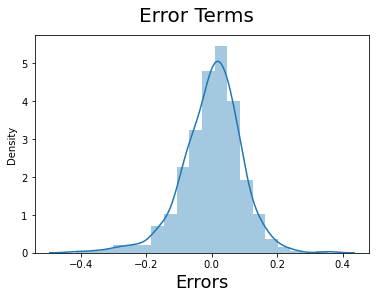

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [59]:
#r2_score for train dataset
r2_train=r2_score(y_true=y_train, y_pred= y_train_pred)
print("R2 score of train",r2_train)

R2 score of train 0.8352755941698322


In [60]:
#Adjusted R2_score for train dataset
n = X_train_rfe3.shape[0]
p = X_train_rfe3.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print("Adjusted R2 of train is: ",adjusted_r2_train)

Adjusted R2 of train is:  0.8313063313787439


# Prediction
Now as I have fitted the model and checked the normality of error terms, now prediction with final model (Model 2) can be made.

In [61]:
#Applying the scaling on the test data
num_vars = ['atemp','temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-61-b2b2afe9d9a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\Users\sonas_000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [63]:
#Splitting into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
X_test.shape

(219, 29)

In [65]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          219 non-null    float64
 1   season_spring                                  219 non-null    uint8  
 2   season_summer                                  219 non-null    uint8  
 3   season_winter                                  219 non-null    uint8  
 4   mnth_jul                                       219 non-null    uint8  
 5   mnth_sept                                      219 non-null    uint8  
 6   weathersit_Light rain_Light snow_Thunderstorm  219 non-null    uint8  
 7   weathersit_Mist_cloudy                         219 non-null    uint8  
 8   yr                                             219 non-null    int64  
 9   holiday                                        219 no

In [66]:
#prediction for test dataset
y_test_pred= lr_model3.predict(X_test_new)

In [67]:
#r2_score for test dataset
r2_test=r2_score(y_true=y_test, y_pred= y_test_pred)
print("R_2 score of test is :",r2_test)

R_2 score of test is : 0.8050618359395866


In [68]:
#Adjusted R2 for test dataset
n = X_test_new.shape[0]
p = X_test_new.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print("Adjusted R2 of test is: ",adjusted_r2_test)

Adjusted R2 of test is:  0.7937062147321838


# Model Evaluation
Let's now plot the graph for actual versus predicted  values

Text(0, 0.5, 'y_pred')

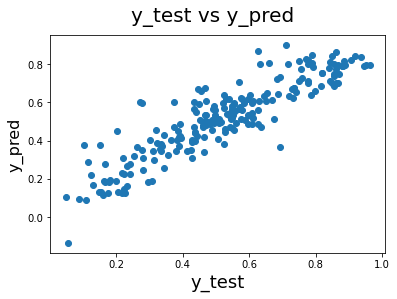

In [69]:
#plotting scatter plot to understand spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [70]:
param = pd.DataFrame(lr_model3.params)
param.insert(0,'Variables',param.index)
param.rename(columns={0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace=True)
param.sort_values(by='Coefficient value', ascending= False, inplace=True)
param

,Variables,Coefficient value
index,,
10,temp,0.491754
8,yr,0.234103
0,const,0.198783
3,season_winter,0.083142
5,mnth_sept,0.076611
2,season_summer,0.046567
4,mnth_jul,-0.052291
1,season_spring,-0.066839
7,weathersit_Mist_cloudy,-0.080636


## Final Result Comparison
- **Train R2 score** : 0.835
- **Train Adjusted R2 score** : 0.831
- **Test R2 score** : 0.805
- **Test Adjusted R2 score** : 0.794

This seems to be a really good model.

## Final Report
We can see that the equation of our best fitted line is:

**cnt = 0.23×yr - 0.10×holiday + 0.49×temp - 0.15×windspeed - 0.07×season_spring + 0.08×season_winter  + 0.08×mnth_sept - 0.05×mnth_jul  + 0.05×season_summer - 0.28×weathersit_Light rain_Light snow_Thunderstorm − 0.08×weathersit_Mist_cloudy + 0.20**

**The Significant variables to predict the demand for shared bikes are:**
- yr
- Holiday
- temp
- windspeed
- Season (spring, winter, summer)
- months (jul, sept)
- Weather (Light rain_Light snow_Thunderstorm, Mist_cloudy)


1. As per our final Model, the top 3 predictor variables that influences the bike booking are:

    **Temperature (temp)** - A coefficient value is ‘0.491754’ which indicates that a unit increase in temp variable increases the bike hire numbers by 0.491754 units.

    **Weather Situation (Light rain_Light snow_Thunderstorm)** - A coefficient value is '-0.284897' which indicates that, w.r.t ,Light rain_Light snow_Thunderstorm, a unit increase in Light rain_Light snow_Thunderstorm variable decreases the bike hire numbers by 0.2947 units.

    **Year (yr)** - A coefficient value is ‘0.234103’ which indicates that a unit increase in yr variable increases the bike hire numbers by 0.234103 units.

    So, it is suggested to consider the above feature atmost importance while planning to achieve maximum Bookings.


2. The next best features that can be considered are:
    	
    **season_winter** - A coefficient value is '0.083142' which indicates that a unit increase in spring variable, decrease in bike hire by 0.08314 units
    
    **windspeed** - A coefficient value is '0.147820' which indicates that a unit increase in windspeed variable, decrease in bike hire by 0.147820


